In [1]:
import pandas as pd
import numpy as np
import time
import sqlite3

data_home = './'

## Read Data

need 'user' 'song' 'play_count' in the data

In [2]:
triplet_dataset = pd.read_csv(filepath_or_buffer=data_home+'train_triplets.txt', 
                              sep='\t', header=None, 
                              names=['user','song','play_count'])

48 million users

In [3]:
triplet_dataset.shape

(48373586, 3)

In [4]:
triplet_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48373586 entries, 0 to 48373585
Data columns (total 3 columns):
user          object
song          object
play_count    int64
dtypes: int64(1), object(2)
memory usage: 1.1+ GB


Raw Data

In [5]:
triplet_dataset.head(n=10)

,user,song,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNZDC12A6D4FC103,1
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBVFZR12A6D4F8AE3,1
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXALG12A8C13C108,1
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1


## For each user, count their number of plays

user data contains 'user id', 'song id', 'play counts'
with such infomation, we obtain users' data, e.g. for each user, we get their play counts seperately

In [6]:
output_dict = {}
with open(data_home+'train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        # find current user
        user = line.split('\t')[0]
        # obtain user's play_count
        play_count = int(line.split('\t')[2])
        # if the user's play_count already exists, we directly add number to it
        if user in output_dict:
            play_count +=output_dict[user]
            output_dict.update({user:play_count})
        output_dict.update({user:play_count})
# output_list: a statistics ----- user：**, play_count: **
output_list = [{'user':k,'play_count':v} for k,v in output_dict.items()]
# convert to DF format
play_count_df = pd.DataFrame(output_list)
# sort so that we can filter lazy users
play_count_df = play_count_df.sort_values(by = 'play_count', ascending = False)

save statistics to csv format

In [7]:
play_count_df.to_csv(path_or_buf='user_playcount_df.csv', index = False)

## For each song, count their plays

In [8]:
output_dict = {}
with open(data_home+'train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        # find current song
        song = line.split('\t')[1]
        # fint current number of plays
        play_count = int(line.split('\t')[2])
        # count total number of plays for each song
        if song in output_dict:
            play_count +=output_dict[song]
            output_dict.update({song:play_count})
        output_dict.update({song:play_count})
output_list = [{'song':k,'play_count':v} for k,v in output_dict.items()]
# convert to DF format
song_count_df = pd.DataFrame(output_list)
song_count_df = song_count_df.sort_values(by = 'play_count', ascending = False)

In [9]:
song_count_df.to_csv(path_or_buf='song_playcount_df.csv', index = False)

## play_count ratings

In [10]:
play_count_df = pd.read_csv(filepath_or_buffer='user_playcount_df.csv')
play_count_df.head(n =10)

,user,play_count
0,093cb74eb3c517c5179ae24caf0ebec51b24d2a2,13132
1,119b7c88d58d0c6eb051365c103da5caf817bea6,9884
2,3fa44653315697f42410a30cb766a4eb102080bb,8210
3,a2679496cd0af9779a92a13ff7c6af5c81ea8c7b,7015
4,d7d2d888ae04d16e994d6964214a1de81392ee04,6494
5,4ae01afa8f2430ea0704d502bc7b57fb52164882,6472
6,b7c24f770be6b802805ac0e2106624a517643c17,6150
7,113255a012b2affeab62607563d03fbdf31b08e7,5656
8,6d625c6557df84b60d90426c0116138b617b9449,5620
9,99ac3d883681e21ea68071019dba828ce76fe94d,5602


In [11]:
song_count_df = pd.read_csv(filepath_or_buffer='song_playcount_df.csv')
song_count_df.head(10)

,song,play_count
0,SOBONKR12A58A7A7E0,726885
1,SOAUWYT12A81C206F1,648239
2,SOSXLTC12AF72A7F54,527893
3,SOFRQTD12A81C233C0,425463
4,SOEGIYH12A6D4FC0E3,389880
5,SOAXGDH12A8C13F8A1,356533
6,SONYKOW12AB01849C9,292642
7,SOPUCYA12A8C13A694,274627
8,SOUFTBI12AB0183F65,268353
9,SOVDSJC12A58A7A271,244730


To filter lazy users and lazy songs, only select the first 100000 users and first 30000 songs

In [12]:
total_play_count = sum(song_count_df.play_count)
print ((float(play_count_df.head(n=100000).play_count.sum())/total_play_count)*100)
play_count_subset = play_count_df.head(n=100000)

# the first 100000 users accounts for 40% of the total play counts

40.8807280500655


In [13]:
(float(song_count_df.head(n=30000).play_count.sum())/total_play_count)*100

78.39315366645269

In [14]:
song_count_subset = song_count_df.head(n=30000)

- the first 30 million songs account for 78.39% of total song plays
- now we have 100 million loyal fans and 30 million popular songs 
- do the filtering

get a subset of 100 million users, 30 million songs

In [15]:
user_subset = list(play_count_subset.user)
song_subset = list(song_count_subset.song)

filter other users' data

In [16]:
# read raw data
triplet_dataset = pd.read_csv(filepath_or_buffer=data_home+'train_triplets.txt', sep='\t', 
                              header=None, names=['user','song','play_count'])
# only want 100 million users' data filter others'
triplet_dataset_sub = triplet_dataset[triplet_dataset.user.isin(user_subset) ]
del(triplet_dataset)
# only want first 30 million songs, have to do the filtering since even the first 100 million
# users may have play count on songs excluded in the frist 30 million songs
triplet_dataset_sub_song = triplet_dataset_sub[triplet_dataset_sub.song.isin(song_subset)]
del(triplet_dataset_sub)

In [17]:
triplet_dataset_sub_song.to_csv(path_or_buf=data_home+'triplet_dataset_sub_song.csv', index=False)

now the data amount

In [18]:
triplet_dataset_sub_song.shape

(10774558, 3)

In [19]:
triplet_dataset_sub_song.head(n=10)

,user,song,play_count
498,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12
499,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1
500,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1
501,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1
502,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7
503,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26
504,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7
505,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5
506,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1
507,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8


## load details about songs

songs may have artist, release date, theme... we have to load these infomation

In [20]:
conn = sqlite3.connect(data_home+'track_metadata.db')
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
cur.fetchall()

[('songs',)]

In [21]:
track_metadata_df = pd.read_sql(con=conn, sql='select * from songs')
track_metadata_df_sub = track_metadata_df[track_metadata_df.song_id.isin(song_subset)]

In [22]:
track_metadata_df_sub.to_csv(path_or_buf=data_home+'track_metadata_df_sub.csv', index=False)

In [23]:
track_metadata_df_sub.shape

(30447, 14)

## the data we have now

In [24]:
triplet_dataset_sub_song = pd.read_csv(filepath_or_buffer=data_home+'triplet_dataset_sub_song.csv',encoding = "utf-8")
track_metadata_df_sub = pd.read_csv(filepath_or_buffer=data_home+'track_metadata_df_sub.csv',encoding = "utf-8")

In [25]:
triplet_dataset_sub_song.head()

,user,song,play_count
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7


In [26]:
track_metadata_df_sub.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMGCB128E079651D,Get Along (Feat: Pace Won) (Instrumental),SOHNWIM12A67ADF7D9,Charango,ARU3C671187FB3F71B,067102ea-9519-4622-9077-57ca4164cfbb,Morcheeba,227.47383,0.819087,0.533117,2002,185967,-1,0
1,TRMMGTX128F92FB4D9,Viejo,SOECFIW12A8C144546,Caraluna,ARPAAPH1187FB3601B,f69d655c-ffd6-4bee-8c2a-3086b2be2fc6,Bacilos,307.51302,0.595554,0.400705,0,6825058,-1,0
2,TRMMGDP128F933E59A,I Say A Little Prayer,SOGWEOB12AB018A4D0,The Legendary Hi Records Albums_ Volume 3: Ful...,ARNNRN31187B9AE7B7,fb7272ba-f130-4f0a-934d-6eeea4c18c9a,Al Green,133.58975,0.779490,0.599210,1978,5211723,-1,11898
3,TRMMHBF12903CF6E59,At the Ball_ That's All,SOJGCRL12A8C144187,Best of Laurel & Hardy - The Lonesome Pine,AR1FEUF1187B9AF3E3,4a8ae4fd-ad6f-4912-851f-093f12ee3572,Laurel & Hardy,123.71546,0.438709,0.307120,0,8645877,-1,0
4,TRMMHKG12903CDB1B5,Black Gold,SOHNFBA12AB018CD1D,Total Life Forever,ARVXV1J1187FB5BF88,6a65d878-fcd0-42cf-aff9-ca1d636a8bcc,Foals,386.32444,0.842578,0.514523,2010,9007438,-1,0


## data cleaning

filter useless and redundent data

In [27]:
# filter useless data
del track_metadata_df_sub['track_id']
del track_metadata_df_sub['artist_mbid']
# filter duplicated data according to whether they have duplicated ids
track_metadata_df_sub = track_metadata_df_sub.drop_duplicates(['song_id'])
# merge two tables
triplet_dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song, track_metadata_df_sub, how='left', left_on='song', right_on='song_id')
# change column names
triplet_dataset_sub_song_merged.rename(columns={'play_count':'listen_count'},inplace=True)

In [28]:
# filter useless columns
del(triplet_dataset_sub_song_merged['song_id'])
del(triplet_dataset_sub_song_merged['artist_id'])
del(triplet_dataset_sub_song_merged['duration'])
del(triplet_dataset_sub_song_merged['artist_familiarity'])
del(triplet_dataset_sub_song_merged['artist_hotttnesss'])
del(triplet_dataset_sub_song_merged['track_7digitalid'])
del(triplet_dataset_sub_song_merged['shs_perf'])
del(triplet_dataset_sub_song_merged['shs_work'])

a new dataset!  have a look!

In [29]:
triplet_dataset_sub_song_merged.head(n=10)

,user,song,listen_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0
5,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26,You're The One,If There Was A Way,Dwight Yoakam,1990
6,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7,Don't Dream It's Over,Recurring Dream_ Best Of Crowded House (Domest...,Crowded House,1986
7,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5,S.O.S.,SOS,Jonas Brothers,2007
8,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1,The Invisible Man,The Invisible Man,Michael Cretu,1985
9,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8,American Idiot [feat. Green Day & The Cast Of ...,The Original Broadway Cast Recording 'American...,Green Day,0


### The most popular songs

In [30]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
# count play times by song name
popular_songs = triplet_dataset_sub_song_merged[['title','listen_count']].groupby('title').sum().reset_index()
# sort result
popular_songs_top_20 = popular_songs.sort_values('listen_count', ascending=False).head(n=20)

# convert to list format in order to conviniently draw digrams
objects = (list(popular_songs_top_20['title']))
# set position
y_pos = np.arange(len(objects))
# corresponding value
performance = list(popular_songs_top_20['listen_count'])
# drawing 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Most popular songs')
 
plt.show()

<Figure size 640x480 with 1 Axes>

### Most popular releases

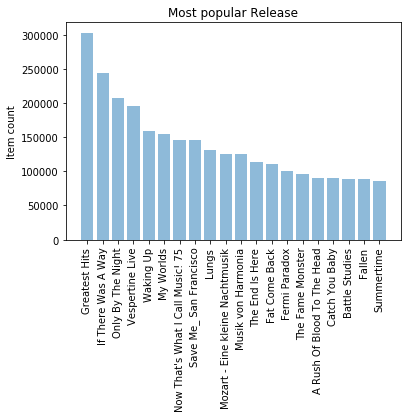

In [31]:
# count play times by release
popular_release = triplet_dataset_sub_song_merged[['release','listen_count']].groupby('release').sum().reset_index()
# sort
popular_release_top_20 = popular_release.sort_values('listen_count', ascending=False).head(n=20)

objects = (list(popular_release_top_20['release']))
y_pos = np.arange(len(objects))
performance = list(popular_release_top_20['listen_count'])
# plot
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Most popular Release')
 
plt.show()

## The most popular artists

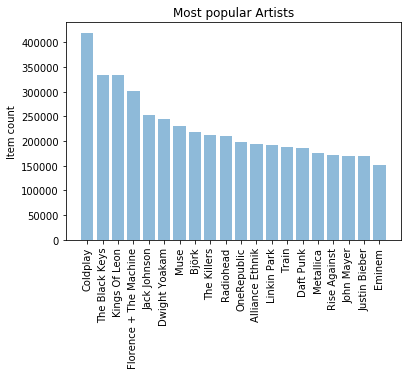

In [32]:
# count by artist
popular_artist = triplet_dataset_sub_song_merged[['artist_name','listen_count']].groupby('artist_name').sum().reset_index()
# sort
popular_artist_top_20 = popular_artist.sort_values('listen_count', ascending=False).head(n=20)

objects = (list(popular_artist_top_20['artist_name']))
y_pos = np.arange(len(objects))
performance = list(popular_artist_top_20['listen_count'])
# plot
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Most popular Artists')
 
plt.show()

## Histogram of User Play Count Distribution

In [33]:
user_song_count_distribution = triplet_dataset_sub_song_merged[['user','title']].groupby('user').count().reset_index().sort_values(
by='title',ascending = False)
user_song_count_distribution.title.describe()

count    99996.000000
mean       107.749890
std         79.742561
min          1.000000
25%         53.000000
50%         89.000000
75%        141.000000
max       1189.000000
Name: title, dtype: float64

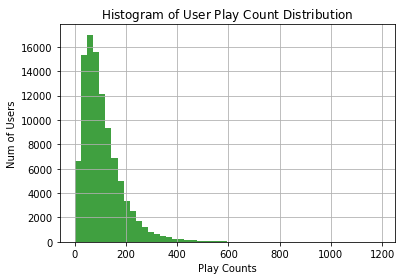

In [34]:
x = user_song_count_distribution.title
n, bins, patches = plt.hist(x, 50, facecolor='green', alpha=0.75)
plt.xlabel('Play Counts')
plt.ylabel('Num of Users')
plt.title(r'$\mathrm{Histogram\ of\ User\ Play\ Count\ Distribution}\ $')
plt.grid(True)
plt.show()

most users' play counts are around 100

## Recommendation System

In [35]:
import Recommenders as Recommenders
from sklearn.model_selection import train_test_split

## Recommend using Leaderboard(For cold start)

In [36]:
triplet_dataset_sub_song_merged_set = triplet_dataset_sub_song_merged
train_data, test_data = train_test_split(triplet_dataset_sub_song_merged_set, test_size = 0.40, random_state=0)

In [37]:
train_data.head()

,user,song,listen_count,title,release,artist_name,year
1901799,28866ea8a809d5d46273cd0989c5515c660ef8c7,SOEYVHS12AB0181D31,1,Monster,The Fame Monster,Lady GaGa,2009
4815185,c9608a24a2a40e0ec38993a70532e7bb56eff22b,SOKIYKQ12A8AE464FC,2,Fight For Your Life,Made In NYC,The Casualties,2000
10513026,24f0b09c133a6a0fe42f097734215dceb468d449,SOETFVO12AB018DFF3,1,Free Style (feat. Kevo_ Mussilini & Lyrical 187),A Bad Azz Mix Tape,Z-RO,0
2659073,4da3c59a0af73245cea000fd5efa30384182bfcb,SOAXJOU12A6D4F6685,1,Littlest Things,Alright_ Still,Lily Allen,2006
5506263,b46c5ed385cad7ecea8af6214f440d19de6eb6c2,SOXBCAY12AB0189EE0,1,La trama y el desenlace,Amar la trama,Jorge Drexler,2010


In [38]:
def create_popularity_recommendation(train_data, user_id, item_id):
    # count according to what is specified(title, release, artist)
    train_data_grouped = train_data.groupby([item_id]).agg({user_id: 'count'}).reset_index()

    # sort it by how many user listen it often, here we replace user as score to strengthen it as a standard for evaluation
    train_data_grouped.rename(columns = {user_id: 'score'},inplace=True)
    
    # sorting
    train_data_sort = train_data_grouped.sort_values(['score', item_id], ascending = [0,1])
    
    # add a column 'Rank'
    train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
    # return specified number of results, here is 20
    popularity_recommendations = train_data_sort.head(20)
    return popularity_recommendations

In [39]:
recommendations = create_popularity_recommendation(triplet_dataset_sub_song_merged,'user','title')

recommendation results

In [40]:
recommendations

,title,score,Rank
19580,Sehr kosmisch,18626,1.0
5780,Dog Days Are Over (Radio Edit),17635,2.0
27314,You're The One,16085,3.0
19542,Secrets,15138,4.0
18636,Revelry,14945,5.0
25070,Undo,14687,6.0
7530,Fireflies,13085,7.0
9640,Hey_ Soul Sister,12993,8.0
25216,Use Somebody,12793,9.0
9921,Horn Concerto No. 4 in E flat K495: II. Romanc...,12346,10.0


## Recommend by Song Similarity

just select the most 5000 popluar songs in order to accelerate computing 

In [41]:
song_count_subset = song_count_df.head(n=5000)
user_subset = list(play_count_subset.user)
song_subset = list(song_count_subset.song)
triplet_dataset_sub_song_merged_sub = triplet_dataset_sub_song_merged[triplet_dataset_sub_song_merged.song.isin(song_subset)]

In [42]:
triplet_dataset_sub_song_merged_sub.head()

,user,song,listen_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0


### Compute song similarities and recommend

In [43]:
import Recommenders as Recommenders
train_data, test_data = train_test_split(triplet_dataset_sub_song_merged_sub, test_size = 0.30, random_state=0)
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user', 'title')
user_id = list(train_data.user)[7]
user_items = is_model.get_user_items(user_id)

In [44]:
is_model.recommend(user_id)

No. of unique songs for the user: 66
no. of unique songs in the training set: 4879
Non zero values in cooccurence_matrix :290327


,user_id,song,score,rank
0,a974fc428825ed071281302d6976f59bfa95fe7e,Put Your Head On My Shoulder (Album Version),0.026334,1
1,a974fc428825ed071281302d6976f59bfa95fe7e,The Strength To Go On,0.025176,2
2,a974fc428825ed071281302d6976f59bfa95fe7e,Come Fly With Me (Album Version),0.024447,3
3,a974fc428825ed071281302d6976f59bfa95fe7e,Moondance (Album Version),0.024118,4
4,a974fc428825ed071281302d6976f59bfa95fe7e,Kotov Syndrome,0.023311,5
5,a974fc428825ed071281302d6976f59bfa95fe7e,Use Somebody,0.023104,6
6,a974fc428825ed071281302d6976f59bfa95fe7e,Lucky (Album Version),0.022930,7
7,a974fc428825ed071281302d6976f59bfa95fe7e,Secrets,0.022889,8
8,a974fc428825ed071281302d6976f59bfa95fe7e,Clocks,0.022562,9
9,a974fc428825ed071281302d6976f59bfa95fe7e,Sway (Album Version),0.022359,10


## Recommend using SVD

user score to a single song defined as:  
user play counts on the song / user total play counts

In [45]:
triplet_dataset_sub_song_merged_sum_df = triplet_dataset_sub_song_merged[['user','listen_count']].groupby('user').sum().reset_index()
triplet_dataset_sub_song_merged_sum_df.rename(columns={'listen_count':'total_listen_count'},inplace=True)
triplet_dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song_merged,triplet_dataset_sub_song_merged_sum_df)
triplet_dataset_sub_song_merged.head()

,user,song,listen_count,title,release,artist_name,year,total_listen_count
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004,329
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007,329
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0,329
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993,329
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0,329


In [46]:
triplet_dataset_sub_song_merged['fractional_play_count'] = triplet_dataset_sub_song_merged['listen_count']/triplet_dataset_sub_song_merged['total_listen_count']

In [47]:
triplet_dataset_sub_song_merged[triplet_dataset_sub_song_merged.user =='d6589314c0a9bcbca4fee0c93b14bc402363afea'][['user','song','listen_count','fractional_play_count']].head()

,user,song,listen_count,fractional_play_count
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,0.036474
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,0.003040
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,0.003040
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,0.003040
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,0.021277


In [48]:
from scipy.sparse import coo_matrix

small_set = triplet_dataset_sub_song_merged
user_codes = small_set.user.drop_duplicates().reset_index()
song_codes = small_set.song.drop_duplicates().reset_index()
user_codes.rename(columns={'index':'user_index'}, inplace=True)
song_codes.rename(columns={'index':'song_index'}, inplace=True)
song_codes['so_index_value'] = list(song_codes.index)
user_codes['us_index_value'] = list(user_codes.index)
small_set = pd.merge(small_set,song_codes,how='left')
small_set = pd.merge(small_set,user_codes,how='left')
mat_candidate = small_set[['us_index_value','so_index_value','fractional_play_count']]
data_array = mat_candidate.fractional_play_count.values
row_array = mat_candidate.us_index_value.values
col_array = mat_candidate.so_index_value.values

data_sparse = coo_matrix((data_array, (row_array, col_array)),dtype=float)

In [55]:
data_sparse, data_sparse.shape

(<99996x30000 sparse matrix of type '<class 'numpy.float64'>'
 	with 10774558 stored elements in COOrdinate format>, (99996, 30000))

- Codes above firstly group by users to compute the total play counts of each user, then obtain user's evaluation on each song(fractional_play_count)  
- With evaluations, we can construct matrix, here we reconstruct indices of user ID and song ID, since the raw ids are too complex.

In [50]:
user_codes[user_codes.user =='2a2f776cbac6df64d6cb505e7e834e01684673b6']

,user_index,user,us_index_value
27516,2981434,2a2f776cbac6df64d6cb505e7e834e01684673b6,27516


### SVD

using scipy

In [51]:
import math as mt
from scipy.sparse.linalg import * # used for matrix multiplication
from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix

In [56]:
def compute_svd(urm, K):
    U, s, Vt = svds(urm, K)

    dim = (len(s), len(s))
    S = np.zeros(dim, dtype=np.float32)
    for i in range(0, len(s)):
        S[i,i] = mt.sqrt(s[i])
    
    U = csc_matrix(U, dtype=np.float32)
    S = csc_matrix(S, dtype=np.float32)
    Vt = csc_matrix(Vt, dtype=np.float32)
    # print(U.shape, S.shape, Vt.shape)
    # (99996, 50) (50, 50) (50, 30000)
    return U, S, Vt

def compute_estimated_matrix(urm, U, S, Vt, uTest, K, test):
    rightTerm = S*Vt 
    max_recommendation = 250
    estimatedRatings = np.zeros(shape=(MAX_UID, MAX_PID), dtype=np.float16)
    recomendRatings = np.zeros(shape=(MAX_UID ,max_recommendation ), dtype=np.float16)
    for userTest in uTest:
        prod = U[userTest, :] * rightTerm
        estimatedRatings[userTest, :] = prod.todense()
        recomendRatings[userTest, :] = (-estimatedRatings[userTest, :]).argsort()[:max_recommendation]
    return recomendRatings

In [57]:
K=50
# data_sparse.shape: (99996, 30000)
urm = data_sparse
MAX_UID = urm.shape[0]
MAX_PID = urm.shape[1]


U, S, Vt = compute_svd(urm, K)

In [58]:
uTest = [4, 5, 6, 7, 8, 873, 23]

uTest_recommended_items = compute_estimated_matrix(urm, U, S, Vt, uTest, K, True)

In [64]:
for user in uTest:
    print("current user to recommend: {}". format(user))
    rank_value = 1
    for i in uTest_recommended_items[user,0:10]:
        song_details = small_set[small_set.so_index_value == i].drop_duplicates('so_index_value')[['title','artist_name']]
        print("Rank：{}  Song：{}\t\tArtist：{}".format(rank_value, list(song_details['title'])[0],list(song_details['artist_name'])[0]))
        rank_value+=1

current user to recommend: 4
Rank：1  Song：Fireflies		Artist：Charttraxx Karaoke
Rank：2  Song：Hey_ Soul Sister		Artist：Train
Rank：3  Song：OMG		Artist：Usher featuring will.i.am
Rank：4  Song：Lucky (Album Version)		Artist：Jason Mraz & Colbie Caillat
Rank：5  Song：Vanilla Twilight		Artist：Owl City
Rank：6  Song：Crumpshit		Artist：Philippe Rochard
Rank：7  Song：Billionaire [feat. Bruno Mars]  (Explicit Album Version)		Artist：Travie McCoy
Rank：8  Song：Love Story		Artist：Taylor Swift
Rank：9  Song：TULENLIEKKI		Artist：M.A. Numminen
Rank：10  Song：Use Somebody		Artist：Kings Of Leon
current user to recommend: 5
Rank：1  Song：Sehr kosmisch		Artist：Harmonia
Rank：2  Song：Ain't Misbehavin		Artist：Sam Cooke
Rank：3  Song：Dog Days Are Over (Radio Edit)		Artist：Florence + The Machine
Rank：4  Song：Revelry		Artist：Kings Of Leon
Rank：5  Song：Undo		Artist：Björk
Rank：6  Song：Cosmic Love		Artist：Florence + The Machine
Rank：7  Song：Home		Artist：Edward Sharpe & The Magnetic Zeros
Rank：8  Song：You've Got The Love		Artist